In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [217]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [218]:
df = pd.read_excel(r"C:\Users\mohamad\ipm 2\Digi_2.xlsx") 
df.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید.\r\nیه شارژ...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [219]:
stopwords = []
file = open(r"C:\Users\mohamad\ipm 2\stopwords-fa.txt").read()
[stopwords.append(x) for x in file.split()]
len(stopwords)

4427

In [220]:
stopwords = set(stopwords)

In [221]:
def remove_stopwords(text):
    text=str(text)
    filtered_tokens = [token for token in text.split() if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [222]:
df.comment = df.comment.apply(remove_stopwords)

In [223]:
df.fillna('unknown', inplace = True)

In [224]:
df.recommend = df.recommend.replace({'\\N' : 3, 'recommended' : 0, 'not_recommended' : 1, 'no_idea' : 2})

In [225]:
df = df[df.recommend != 3]

In [226]:
X = df.comment.astype(str)
y = df.recommend

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [228]:
vectorizer = CountVectorizer(min_df = 1, lowercase = False) #AttributeError: 'int' object has no attribute 'lower'

In [229]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [230]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [231]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

c:\users\mohamad\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mohamad\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7618987739704496

### deep

In [232]:
from keras.models import Sequential
from keras import layers

In [233]:
input_dim = X_train.shape[1]

In [235]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [240]:
model = Sequential()
model.add(layers.Dense(25, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [241]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 25)                1007725   
_________________________________________________________________
dense_26 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 33        
Total params: 1,008,018
Trainable params: 1,008,018
Non-trainable params: 0
_________________________________________________________________


In [242]:
history = model.fit(X_train, y_train,
                    epochs = 10,
                    verbose = True,
                    validation_data = (X_test, y_test),
                    batch_size = 64)

Train on 47713 samples, validate on 15905 samples
Epoch 1/10
47713/47713 [==============================] - 30s 626us/step - loss: 0.6747 - acc: 0.7402 - val_loss: 0.5993 - val_acc: 0.7682
Epoch 2/10
47713/47713 [==============================] - 27s 571us/step - loss: 0.4792 - acc: 0.8178 - val_loss: 0.6044 - val_acc: 0.7659
Epoch 3/10
47713/47713 [==============================] - 27s 568us/step - loss: 0.3701 - acc: 0.8644 - val_loss: 0.6620 - val_acc: 0.7588
Epoch 4/10
47713/47713 [==============================] - 28s 577us/step - loss: 0.2784 - acc: 0.9025 - val_loss: 0.7680 - val_acc: 0.7439
Epoch 5/10
47713/47713 [==============================] - 27s 565us/step - loss: 0.2106 - acc: 0.9277 - val_loss: 0.8846 - val_acc: 0.7431
Epoch 6/10
47713/47713 [==============================] - 27s 571us/step - loss: 0.1620 - acc: 0.9458 - val_loss: 1.0055 - val_acc: 0.7403
Epoch 7/10
47713/47713 [==============================] - 27s 566us/step - loss: 0.1267 - acc: 0.9597 - val_loss: 1.

In [243]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9822


In [244]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.7145


In [245]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

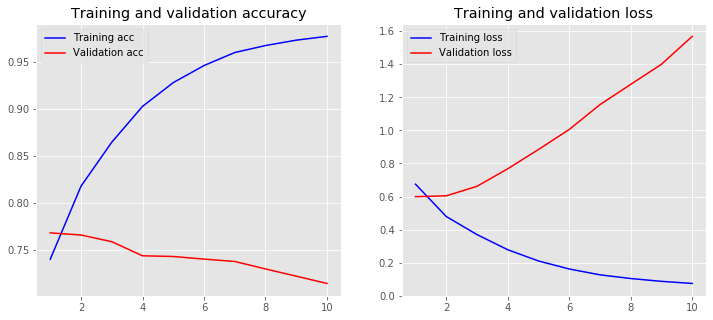

In [246]:
plot_history(history)